# Linear Regression
target:![](Linear_Regression_target.png)
cost function:![](Linear_Regression_cost.png)
gradient delta w: ![](Linear_Regression_gradient_w.png)
w update: ![](Linear_Regression_w_update.png)
predictor: ![](Linear_Regression_predictor.png)

In [2]:
import numpy as np

1.基于当前的w，计算预测值：

In [1]:
def compute_prediction(X, weights):
    """ Compute the prediction y_hat based on current weights
    Args:
        X (numpy.ndarray)
        weights (numpy.ndarray)
    Returns:
        numpy.ndarray, y_hat of X under weights
    """
    predictions = np.dot(X, weights)
    return predictions

2.用梯度下降一步，更新w向量：![](Linear_Regression_w_update.png)

In [3]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """ Update weights by one step
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        weights (numpy.ndarray)
        learning_rate (float)
    Returns:
        numpy.ndarray, updated weights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train-predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

3.cost function: ![](Linear_Regression_cost.png)

In [4]:
def compute_cost(X, y, weights):
    """ Compute the cost J(w)
    Args:
        X, y (numpy.ndarray, data set)
        weights (numpy.ndarray)
    Returns:
        float
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions - y) ** 2 / 2.0)
    return cost

联合以上的训练函数：梯度下降多步，多次更新得到最佳w

In [5]:
def train_linear_regression(X_train, y_train, max_iter,learning_rate, fit_intercept=False,every=100):
    """ Train a linear regression model with gradient descent
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learning weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train)) # 加列，w0维
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        if iteration % every == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

预测新样本：

In [6]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] -1:  # 如果有w0，那么去掉w0后，X维数与 w 数相等
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

### 测试

In [7]:
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])

y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])

In [8]:
weights = train_linear_regression(X_train, y_train, max_iter=100,
                                  learning_rate=0.01, fit_intercept=True)

5.571972628


测试模型泛化能力：

In [9]:
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])

In [10]:
predictions = predict(X_test, weights)

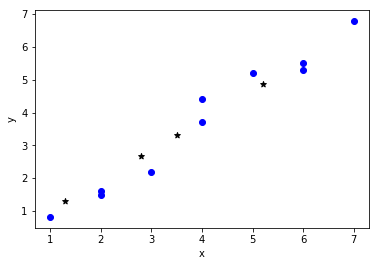

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train[:,0],y_train, marker='o', c='b')
plt.scatter(X_test[:,0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 下面试试另一个数据集

In [12]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

(442, 10)


In [13]:
num_test = 30 # 最后30个样本作测试集
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]

In [14]:
weights = train_linear_regression(X_train, y_train, max_iter=5000,
                                  learning_rate=1, fit_intercept=True,every=500)

2960.1229915
1539.55080927
1487.02495658
1480.27644342
1479.01567047
1478.57496091
1478.29639883
1478.06282572
1477.84756968
1477.64304737


In [15]:
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]

In [16]:
predictions = predict(X_test, weights)
print(predictions)

[ 232.22305668  123.87481969  166.12805033  170.23901231  228.12868839
  154.95746522  101.09058779   87.33631249  143.68332296  190.29353122
  198.00676871  149.63039042  169.56066651  109.01983998  161.98477191
  133.00870377  260.1831988   101.52551082  115.76677836  120.7338523
  219.62602446   62.21227353  136.29989073  122.27908721   55.14492975
  191.50339388  105.685612    126.25915035  208.99755875   47.66517424]


In [17]:
print(y_test)

[ 261.  113.  131.  174.  257.   55.   84.   42.  146.  212.  233.   91.
  111.  152.  120.   67.  310.   94.  183.   66.  173.   72.   49.   64.
   48.  178.  104.  132.  220.   57.]


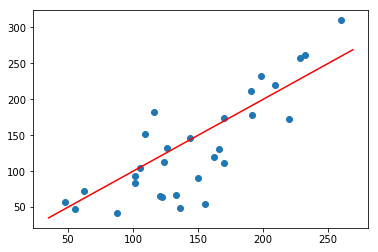

In [19]:
plt.scatter(predictions, y_test)
plt.plot(range(35,270),range(35,270),c='r')
plt.show()

### SGDRegression:

In [20]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_loss', #平方误差，logistic采用log
                         penalty='l2', alpha=0.0001,# 惩罚项，及惩罚系数
                         learning_rate='constant',eta0=0.01, n_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)
print(regressor.score(X_test, y_test))

[ 232.91769165  126.85494137  170.10367236  172.57923323  228.38605863
  156.75435403  105.71718456   91.2615635   147.52655912  192.80695213
  199.06972106  153.33748946  172.04874909  110.4570581   166.2439146
  136.02831011  261.21659482  105.00907156  119.49003632  124.18292536
  221.00280014   67.32906574  139.3441837   125.13016114   59.28931165
  192.98524799  111.102523    130.18410598  209.01349025   53.08477799]
0.61807028379


### 性能度量

In [21]:
# Measuring model performance after hyperparameter tuning with grid search
diabetes = datasets.load_diabetes()
num_test = 30
X_train = diabetes.data[:-num_test,:]
y_train = diabetes.target[:-num_test]
X_test = diabetes.data[-num_test:]
y_test = diabetes.target[-num_test:]

In [22]:
param_grid = {
    'alpha': [1e-07, 1e-06, 1e-05],
    'penalty': ['l1','l2','None'],
    'eta0': [0.01, 0.005, 0.1, 1],
    'n_iter': [300, 1000, 3000]
}

from sklearn.model_selection import GridSearchCV
regressor = SGDRegressor(loss='squared_loss', learning_rate='constant')
grid_search = GridSearchCV(regressor, param_grid, cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-07, 1e-06, 1e-05], 'penalty': ['l1', 'l2', 'None'], 'eta0': [0.01, 0.005, 0.1, 1], 'n_iter': [300, 1000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
print(grid_search.best_params_)
regressor_best = grid_search.best_estimator_

{'alpha': 1e-06, 'eta0': 0.01, 'n_iter': 300, 'penalty': 'None'}


In [25]:
regressor_best.score(X_test, y_test)
predictions = regressor_best.predict(X_test)

In [27]:
predictions = regressor_best.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE: ',mean_squared_error(y_test, predictions))
print('MAE: ',mean_absolute_error(y_test, predictions))
print('r2: ',r2_score(y_test, predictions))

MSE:  1904.99592924
MAE:  34.8987433792
r2:  0.630256544426
